# **Criação do modelo de IA para análise dos Insumos da Engenharia Civil**

In [36]:
import os
import random
import shutil
import warnings
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Cat = Brita
Dog = Tijolo

In [13]:
# Organize data em train, valid, test dirs
os.chdir('/mnt/c/Users/Desenvolvedor/TrainsIA/train_base_insumos/train')


if os.path.isdir('train/tijolo') is False:
    os.makedirs('train/tijolo')
    os.makedirs('train/brita')
    os.makedirs('valid/tijolo')
    os.makedirs('valid/brita')
    os.makedirs('test/tijolo')
    os.makedirs('test/brita')

    for i in random.sample(glob.glob('brita*'), 200):
        shutil.move(i, 'train/brita')      
    for i in random.sample(glob.glob('tijolo*'), 250):
        shutil.move(i, 'train/tijolo')
    for i in random.sample(glob.glob('brita*'), 100):
        shutil.move(i, 'valid/brita')        
    for i in random.sample(glob.glob('tijolo*'), 100):
        shutil.move(i, 'valid/tijolo')
    for i in random.sample(glob.glob('brita*'), 49):
        shutil.move(i, 'test/brita')      
    for i in random.sample(glob.glob('tijolo*'), 54):
        shutil.move(i, 'test/tijolo')

os.chdir('../')

In [14]:
# Caminhos gerais das pastas
train_path = '/mnt/c/Users/Desenvolvedor/TrainsIA/train_base_insumos/train/train'
valid_path = '/mnt/c/Users/Desenvolvedor/TrainsIA/train_base_insumos/train/valid'
test_path = '/mnt/c/Users/Desenvolvedor/TrainsIA/train_base_insumos/train/test'

In [15]:
# Define grupos de imagens necessários para treinar e validar resultados
print(train_path)
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['brita', 'tijolo'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['brita', 'tijolo'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['brita', 'tijolo'], batch_size=10, shuffle=False)

/mnt/c/Users/Desenvolvedor/TrainsIA/train_base_insumos/train/train
Found 450 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

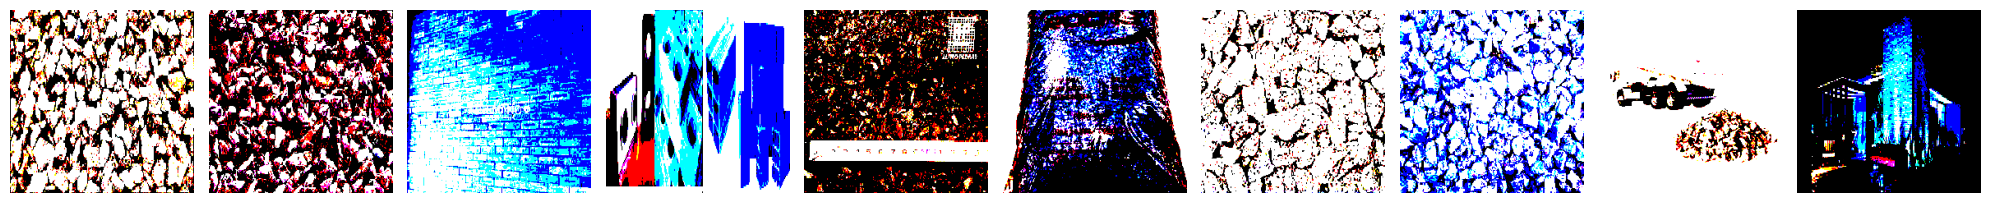

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [22]:
imgs, labels = next(train_batches)

plotImages(imgs)
print(labels)

# **Criando um modelo VGG16**

In [28]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

2022-09-26 02:33:03.375377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-26 02:33:03.375805: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-26 02:33:03.376079: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RF-DEV012): /proc/driver/nvidia/version does not exist
2022-09-26 02:33:03.380618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-26 02:33:03.661936: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

2022-09-26 02:33:15.730203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 predictions (Dense)         (None, 1000)              4097000   
                                                                 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


In [29]:
type(vgg16_model)

keras.engine.functional.Functional

In [31]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [34]:
for layer in model.layers:
    layer.trainable = False

model.add(Dense(units= 2, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_batches, steps_per_epoch=len(train_batches),
          validation_data=valid_batches, validation_steps=len(valid_batches),
          epochs=5, verbose=2
)

Epoch 1/5


2022-09-26 02:44:30.186634: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.


45/45 - 72s - loss: 0.5543 - accuracy: 0.7844 - val_loss: 0.2759 - val_accuracy: 0.9050 - 72s/epoch - 2s/step
Epoch 2/5
45/45 - 67s - loss: 0.1793 - accuracy: 0.9378 - val_loss: 0.1828 - val_accuracy: 0.9400 - 67s/epoch - 1s/step
Epoch 3/5
45/45 - 66s - loss: 0.1043 - accuracy: 0.9689 - val_loss: 0.1496 - val_accuracy: 0.9550 - 66s/epoch - 1s/step
Epoch 4/5
45/45 - 67s - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.1327 - val_accuracy: 0.9750 - 67s/epoch - 1s/step
Epoch 5/5
45/45 - 64s - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.1241 - val_accuracy: 0.9700 - 64s/epoch - 1s/step


# *Exportando modelo para uso*

In [41]:
import tensorflowjs as tfjs

_dir = '/mnt/c/Users/Desenvolvedor/TrainsIA/IA-model'
if os.path.isdir(_dir) is False:
    tfjs.converters.save_keras_model(model, _dir)
    print('Model save')

Model save
